# Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import datetime

gc.collect()
sns.set_style("whitegrid")
plt.style.use('ggplot')
pd.set_option("display.precision", 4)

# Ignore Warnings

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
 
import warnings
warnings.filterwarnings(action='ignore')

# Read Data

In [3]:
Orders = pd.read_excel('RestaurantOrders.xlsx')
Details = pd.read_excel('RestaurantsDetails.xlsx')

In [4]:
Orders.rename(columns={'Payment Mode': 'Payment Method'}, inplace=True)

In [5]:
Orders

,Order ID,Customer Name,RestaurantID,Order Date,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,2022-01-01 19:21:00,5,258,Credit Card,41,3,5
2,OD3,David,9,2022-01-01 23:15:00,7,594,Cash on Delivery,30,3,4
3,OD4,Selva,4,2022-01-01 20:31:00,5,868,Cash on Delivery,30,3,4
4,OD5,Vinny,4,2022-01-01 11:10:00,4,170,Debit Card,18,4,3
...,...,...,...,...,...,...,...,...,...,...
495,OD496,Chinny,20,2022-01-01 15:22:00,6,1184,Cash on Delivery,13,4,2
496,OD497,Veronica,17,2022-01-01 13:31:00,5,541,Credit Card,27,4,3
497,OD498,Chinny,10,2022-01-01 21:31:00,6,1049,Cash on Delivery,27,3,4
498,OD499,Charlie,2,2022-01-01 14:10:00,5,758,Cash on Delivery,29,3,3


In [6]:
Details

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro
5,6,Willies,French,Zone D,Pro
6,7,AMN,North Indian,Zone D,Ordinary
7,8,Oslo,French,Zone B,Ordinary
8,9,Excel Restaurant,North Indian,Zone D,Ordinary
9,10,Dave Hotel,South Indian,Zone A,Ordinary


# Select Important Features Only

In [7]:
Orders = Orders[['Order ID','RestaurantID', 'Quantity of Items', 'Order Amount', 'Payment Method', 'Delivery Time Taken (mins)', 'Customer Rating-Food', 'Customer Rating-Delivery', 'Order Date']]

In [8]:
Orders['Order Date'] = pd.to_datetime(Orders['Order Date'])


In [9]:
Orders['Order Time'] = Orders['Order Date'].dt.hour.astype(int)

In [10]:
Orders.drop('Order Date', axis=1,inplace=True)

In [11]:
Orders

,Order ID,RestaurantID,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,Order Time
0,OD1,6,5,633,Debit Card,47,5,3,23
1,OD2,13,5,258,Credit Card,41,3,5,19
2,OD3,9,7,594,Cash on Delivery,30,3,4,23
3,OD4,4,5,868,Cash on Delivery,30,3,4,20
4,OD5,4,4,170,Debit Card,18,4,3,11
...,...,...,...,...,...,...,...,...,...
495,OD496,20,6,1184,Cash on Delivery,13,4,2,15
496,OD497,17,5,541,Credit Card,27,4,3,13
497,OD498,10,6,1049,Cash on Delivery,27,3,4,21
498,OD499,2,5,758,Cash on Delivery,29,3,3,14


In [12]:
Details = Details[['RestaurantID', 'RestaurantName', 'Cuisine']]

In [13]:
Details

,RestaurantID,RestaurantName,Cuisine
0,1,The Cave Hotel,Continental
1,2,SSK Hotel,North Indian
2,3,ASR Restaurant,South Indian
3,4,Win Hotel,South Indian
4,5,Denver Restaurant,Continental
5,6,Willies,French
6,7,AMN,North Indian
7,8,Oslo,French
8,9,Excel Restaurant,North Indian
9,10,Dave Hotel,South Indian


# Merge Dataframes Into One Datafram

In [14]:
OrdersDetails = Orders.merge(Details, on='RestaurantID', how='inner')

In [15]:
OrdersDetails.drop('RestaurantID', inplace=True, axis=1)

In [16]:
OrdersDetails

,Order ID,Quantity of Items,Order Amount,Payment Method,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,Order Time,RestaurantName,Cuisine
0,OD1,5,633,Debit Card,47,5,3,23,Willies,French
1,OD68,5,345,Cash on Delivery,22,4,5,11,Willies,French
2,OD76,7,934,Debit Card,30,2,4,12,Willies,French
3,OD78,5,908,Debit Card,15,3,2,11,Willies,French
4,OD96,4,300,Cash on Delivery,27,2,2,15,Willies,French
...,...,...,...,...,...,...,...,...,...,...
495,OD389,4,460,Cash on Delivery,31,4,5,20,Vrinda Bhavan,North Indian
496,OD393,4,450,Debit Card,15,2,4,18,Vrinda Bhavan,North Indian
497,OD434,7,837,Debit Card,50,1,1,14,Vrinda Bhavan,North Indian
498,OD437,5,1169,Debit Card,43,3,5,11,Vrinda Bhavan,North Indian


# Ploting Function

In [17]:
def bar_plot(name1, name2, data):
    ax = sns.barplot(x=name1, y=name2 ,data=data, width=0.3, errorbar=None) 
    ax.set_title('{} vs {}'.format(name2, name1),size=12) 
    ax.set_ylabel('{}'.format(name2),size=10);
    ax.set_xlabel('{}'.format(name1),size=10);

In [18]:
def box_plot(name1, name2, data):
    ax = sns.boxplot(x=name1, y=name2 ,data=data, width=0.3) 
    ax.set_title('{} vs {}'.format(name2, name1),size=12) 
    ax.set_ylabel('{}'.format(name2),size=10);
    ax.set_xlabel('{}'.format(name1),size=10);

In [19]:
def pie_chart(name):
    OrdersDetails[name].value_counts().plot.pie(autopct = '%0.0f%%',
                                    textprops={'size':'small'},
                                    title = "{} Pie Chart".format(name),
                                    figsize = (6,6),
                                    shadow=True, 
                                    startangle=90,);
    plt.ylabel('');

In [20]:
def hist_plot(name1, name2):
    ax = sns.histplot(binwidth=0.2, y=name1, hue=name2, data=OrdersDetails, stat="count", multiple="stack");
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title('{} {} Count'.format(name1, name2))
    ax.set_ylabel('{}'.format(name1),size=10);
    ax.set_xlabel('',size=10);

# Rating Of Each Restaurant

In [21]:
RestaurantRating= OrdersDetails.groupby(['RestaurantName'], as_index=False, sort=True).agg({'Customer Rating-Delivery': [np.mean, max, min], 'Customer Rating-Food': [np.mean, max, min]})

In [22]:
RestaurantRating

RestaurantName Customer Rating-Delivery         Customer Rating-Food  \
                                          mean max min                 mean   
0                 AMN                   3.0909   5   1               3.6818   
1      ASR Restaurant                   3.2174   5   1               3.4783   
2    Anand Restaurant                   3.0690   5   1               3.3793   
3     Chew Restaurant                   2.5484   5   1               3.1935   
4          Dave Hotel                   3.3500   5   1               3.3000   
5   Denver Restaurant                   2.4783   5   1               3.0870   
6              Ellora                   3.0938   5   1               3.5312   
7    Excel Restaurant                   3.0000   5   1               3.4783   
8           KSR Hotel                   2.8750   5   1               3.2500   
9                Oslo                   2.7391   5   1               3.3913   
10              Ruchi                   3.0000   5   1               3.5714   
11          SSK Hotel                   2.8500   5   1               3.3500   
12          Sam Hotel                   2.7600   5   1               3.3200   
13     The Cave Hotel                   3.5000   5   1               3.5938   
14          The Taste                   3.1111   5   1               3.1111   
15    Veer Restaurant                   2.6897   5   1               3.1034   
16      Vrinda Bhavan                   3.0625   5   1               3.9375   
17            Willies                   3.0333   5   1               3.2667   
18          Win Hotel                   3.2963   5   1               2.9259   
19            Zam Zam                   3.0800   5   1               3.4400   

            
   max min  
0    5   2  
1    5   2  
2    5   1  
3    5   1  
4    5   2  
5    5   1  
6    5   1  
7    5   1  
8    5   2  
9    5   1  
10   5   1  
11   5   1  
12   5   1  
13   5   2  
14   5   1  
15   5   1  
16   5   1  
17   5   1  
18   5   1  
19   5   1

# Restaurants Of Each Cusine

In [23]:
def restaurant_cuisine(name):
    name = OrdersDetails[OrdersDetails['Cuisine'] == name]['RestaurantName']
    Restaurant = set()

    for i in name:
        Restaurant.add(i)
    return Restaurant

**1. African Cuisine**

In [24]:
AfricanRestaurant = restaurant_cuisine('African')
AfricanRestaurant

{'Anand Restaurant', 'Ellora'}

**2. Arabian Cuisine**

In [25]:
ArabianCuisine = restaurant_cuisine('Arabian')
ArabianCuisine

{'Zam Zam'}

**3. Belgian Cuisine**

In [26]:
BelgianCuisine = restaurant_cuisine('Belgian')
BelgianCuisine

{'Chew Restaurant', 'Sam Hotel'}

**4. Chinese Cuisine**

In [27]:
ChineseCuisine = restaurant_cuisine('Chinese')
ChineseCuisine

{'KSR Hotel', 'Ruchi', 'Veer Restaurant'}

**5. Continental Cuisine**

In [28]:
ContinentalCuisine = restaurant_cuisine('Continental')
ContinentalCuisine

{'Denver Restaurant', 'The Cave Hotel'}

**6.French Cuisine**

In [29]:
FrenchCuisine = restaurant_cuisine('French')
FrenchCuisine

{'Oslo', 'The Taste', 'Willies'}

**7. North Indian Cuisine** 

In [30]:
NorthIndianCuisine = restaurant_cuisine('North Indian')
NorthIndianCuisine

{'AMN', 'Excel Restaurant', 'SSK Hotel', 'Vrinda Bhavan'}

**8. South Indian Cuisine**

In [31]:
SouthIndianCuisine = restaurant_cuisine('South Indian')
SouthIndianCuisine

{'ASR Restaurant', 'Dave Hotel', 'Win Hotel'}

# Delivery Time Taken For Each Restaurant

In [32]:
RestaurantDelivery = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Delivery Time Taken (mins)': [np.mean, max, min]}).astype(int)
RestaurantDelivery

Delivery Time Taken (mins)        
                                        mean max min
RestaurantName                                      
AMN                                       30  50  11
ASR Restaurant                            31  50  12
Anand Restaurant                          32  50  10
Chew Restaurant                           31  49  13
Dave Hotel                                27  48  10
Denver Restaurant                         29  47  10
Ellora                                    32  50  10
Excel Restaurant                          28  49  11
KSR Hotel                                 30  50  10
Oslo                                      30  48  13
Ruchi                                     33  50  12
SSK Hotel                                 30  48  10
Sam Hotel                                 31  49  10
The Cave Hotel                            26  46  10
The Taste                                 29  50  11
Veer Restaurant                           31  50  10
Vrinda Bhavan                             32  50  14
Willies                                   31  50  12
Win Hotel                                 30  50  11
Zam Zam                                   28  46  12

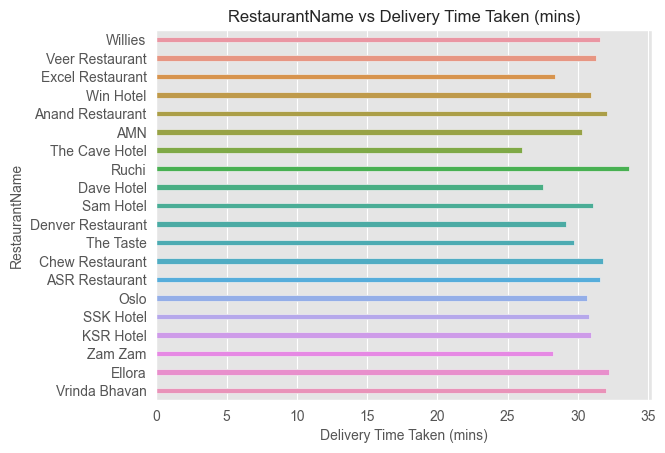

In [33]:
bar_plot('Delivery Time Taken (mins)', 'RestaurantName', OrdersDetails)

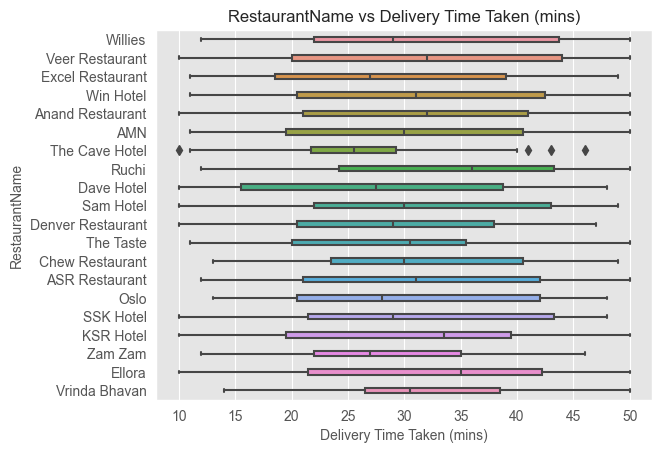

In [34]:
box_plot('Delivery Time Taken (mins)', 'RestaurantName', OrdersDetails)

# Order Amount Of Each Restaurant


In [35]:
RestaurantSales = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Order Amount': [np.mean, max, min]})
RestaurantSales

Order Amount           
                          mean   max  min
RestaurantName                           
AMN                   587.5455  1165   11
ASR Restaurant        546.9130  1119   86
Anand Restaurant      641.0000  1198   50
Chew Restaurant       567.6129  1184   12
Dave Hotel            541.9000  1050   59
Denver Restaurant     693.3913  1193  167
Ellora                558.2188  1165   27
Excel Restaurant      517.4348   976   45
KSR Hotel             524.7917  1011    3
Oslo                  600.6522  1196   65
Ruchi                 488.3571  1047    6
SSK Hotel             605.3500  1155   40
Sam Hotel             696.0000  1115  102
The Cave Hotel        591.6875  1015   28
The Taste             721.2222  1160  124
Veer Restaurant       660.9655  1091   19
Vrinda Bhavan         610.7500  1169   20
Willies               610.8000  1068  124
Win Hotel             571.7778  1017  114
Zam Zam               664.8800  1178   29

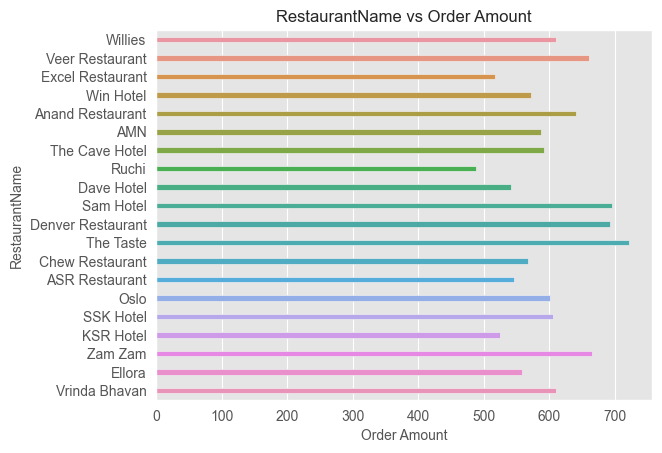

In [36]:
bar_plot('Order Amount', 'RestaurantName', OrdersDetails)

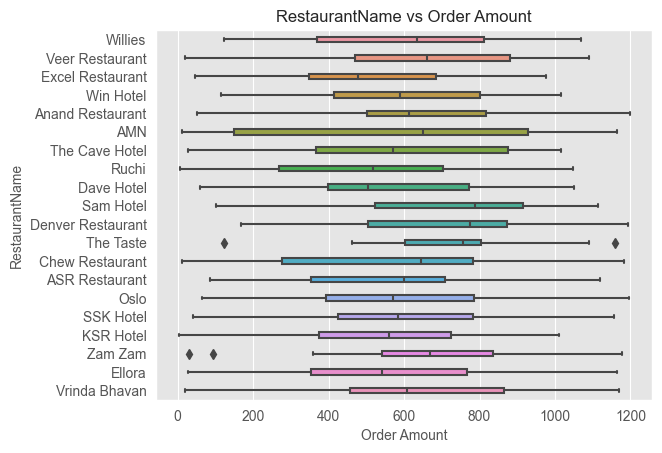

In [37]:
box_plot('Order Amount', 'RestaurantName', OrdersDetails)

# Total Amount Of Each Restaurant

In [38]:
RestaurantTotalAmount = OrdersDetails.groupby(['RestaurantName'], as_index=False, sort=True).agg(TotalAmmount=('Order Amount', sum))

In [39]:
RestaurantTotalAmount

,RestaurantName,TotalAmmount
0,AMN,12926
1,ASR Restaurant,12579
2,Anand Restaurant,18589
3,Chew Restaurant,17596
4,Dave Hotel,10838
5,Denver Restaurant,15948
6,Ellora,17863
7,Excel Restaurant,11901
8,KSR Hotel,12595
9,Oslo,13815


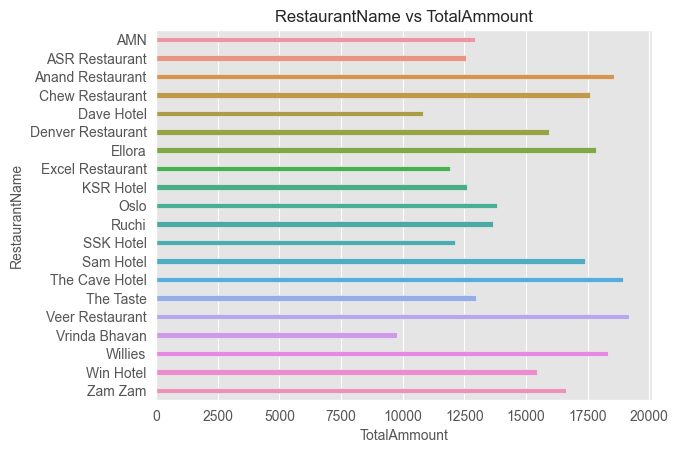

In [40]:
bar_plot('TotalAmmount', 'RestaurantName', RestaurantTotalAmount)

# Sales Quantity Of Each Restaurant

In [41]:
RestaurantSalesQuantity = OrdersDetails.groupby(['RestaurantName'], as_index=True, sort=True).agg({'Quantity of Items': [np.mean, max, min, sum]}).astype(int)
RestaurantSalesQuantity

Quantity of Items             
                               mean max min  sum
RestaurantName                                  
AMN                               4   7   1   95
ASR Restaurant                    4   7   2  104
Anand Restaurant                  5   7   1  146
Chew Restaurant                   4   7   1  126
Dave Hotel                        4   7   1   85
Denver Restaurant                 4   6   3  110
Ellora                            4   7   1  154
Excel Restaurant                  4   7   1  102
KSR Hotel                         4   7   1  103
Oslo                              4   7   1  108
Ruchi                             4   7   1  112
SSK Hotel                         4   7   1   92
Sam Hotel                         5   7   1  127
The Cave Hotel                    4   7   1  157
The Taste                         5   7   2   90
Veer Restaurant                   5   7   1  146
Vrinda Bhavan                     5   7   1   82
Willies                           4   7   1  144
Win Hotel                         4   7   1  127
Zam Zam                           4   7   1  116

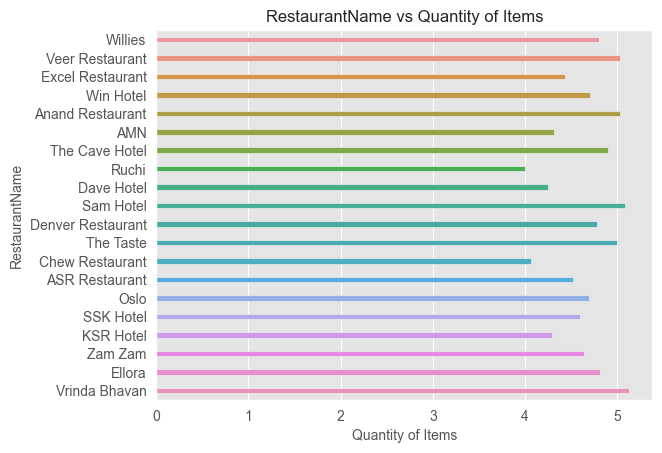

In [42]:
bar_plot('Quantity of Items', 'RestaurantName', OrdersDetails)

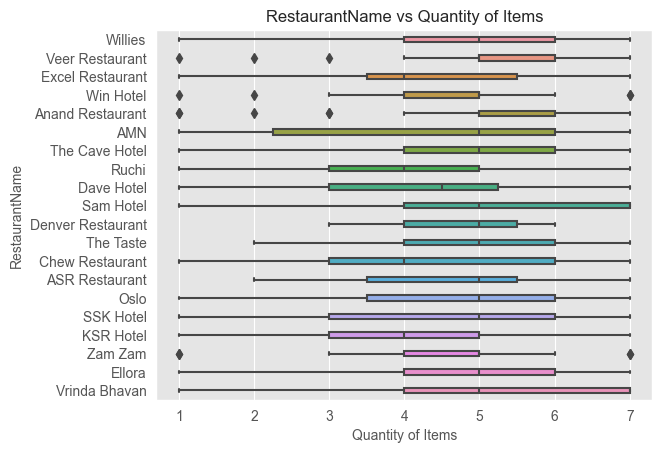

In [43]:
box_plot('Quantity of Items', 'RestaurantName', OrdersDetails)

# Order Time Of Each Restaurant

In [44]:
RestaurantSalesQuantity = OrdersDetails.groupby(['RestaurantName'], as_index=False, sort=True).agg(OrderTime = ('Order Time', np.mean))
RestaurantSalesQuantity

,RestaurantName,OrderTime
0,AMN,15.8636
1,ASR Restaurant,15.8261
2,Anand Restaurant,16.1034
3,Chew Restaurant,16.5161
4,Dave Hotel,17.7000
5,Denver Restaurant,16.5217
6,Ellora,15.6562
7,Excel Restaurant,16.2609
8,KSR Hotel,15.6250
9,Oslo,16.3913


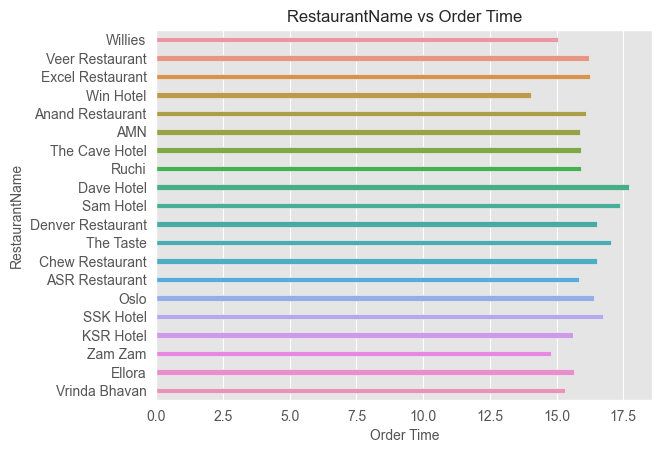

In [45]:
bar_plot('Order Time', 'RestaurantName', OrdersDetails)

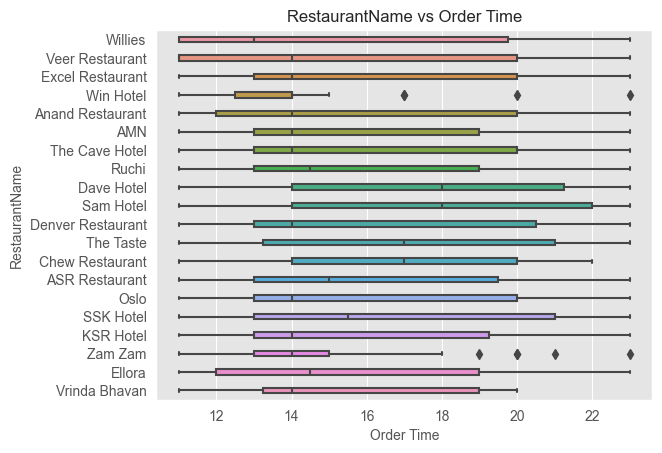

In [46]:
box_plot('Order Time', 'RestaurantName', OrdersDetails)

# Count Of Each Types Of Payment Method For Each Restaurant

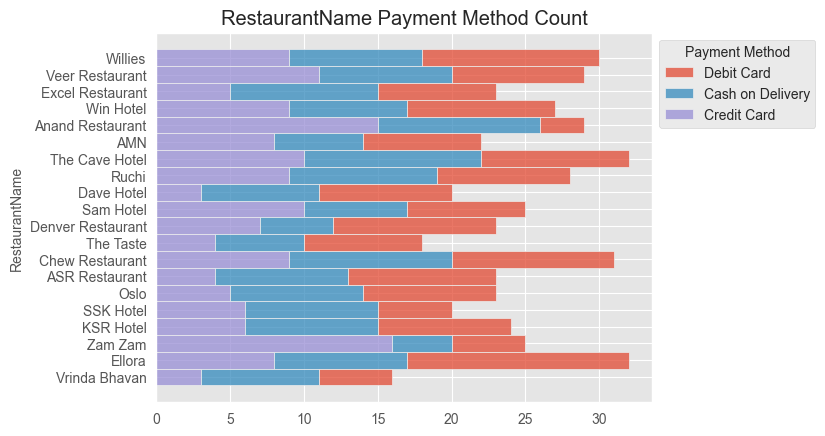

In [47]:
hist_plot('RestaurantName', 'Payment Method')

# Rating Of Each Cuisine

In [48]:
CuisineRating= OrdersDetails.groupby(['Cuisine'], as_index=False, sort=True).agg({'Customer Rating-Delivery': [np.mean, max, min], 'Customer Rating-Food': [np.mean, max, min]})

In [49]:
CuisineRating

Cuisine Customer Rating-Delivery         Customer Rating-Food        
                                    mean max min                 mean max min
0       African                   3.0820   5   1               3.4590   5   1
1       Arabian                   3.0800   5   1               3.4400   5   1
2       Belgian                   2.6429   5   1               3.2500   5   1
3       Chinese                   2.8519   5   1               3.3086   5   1
4   Continental                   3.0727   5   1               3.3818   5   1
5        French                   2.9577   5   1               3.2676   5   1
6  North Indian                   3.0000   5   1               3.5926   5   1
7  South Indian                   3.2857   5   1               3.2143   5   1

# Delivery Time Taken For Each Cuisine

In [50]:
CuisineDelivery = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Delivery Time Taken (mins)': [np.mean, max, min]})
CuisineDelivery

Delivery Time Taken (mins)        
                                   mean max min
Cuisine                                        
African                         32.1311  50  10
Arabian                         28.2000  46  12
Belgian                         31.4821  49  10
Chinese                         32.0000  50  10
Continental                     27.3273  47  10
French                          30.8169  50  11
North Indian                    30.2222  50  10
South Indian                    30.1714  50  10

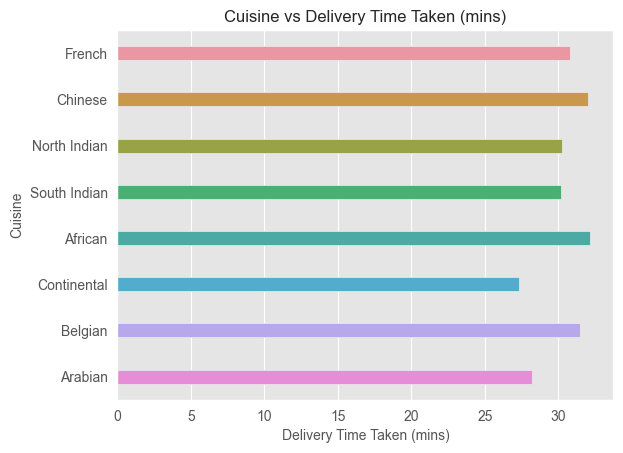

In [51]:
bar_plot('Delivery Time Taken (mins)', 'Cuisine', OrdersDetails)

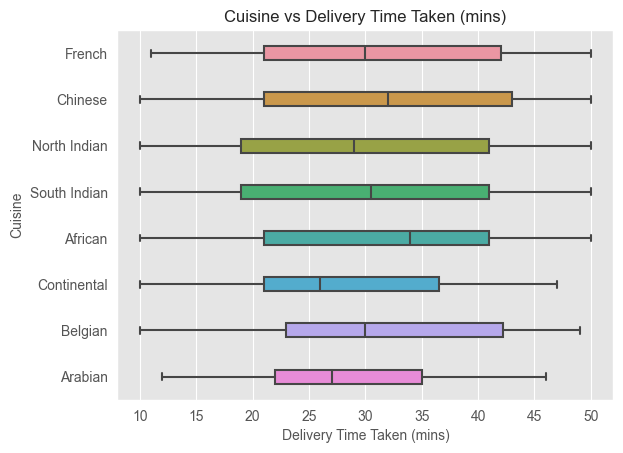

In [52]:
box_plot('Delivery Time Taken (mins)', 'Cuisine', OrdersDetails)

# Order Amount Of Each Cuisine


In [53]:
CuisineSales = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Order Amount': [np.mean, max, min]})
CuisineSales

Order Amount          
                     mean   max min
Cuisine                            
African          597.5738  1198  27
Arabian          664.8800  1178  29
Belgian          624.9286  1184  12
Chinese          560.9506  1091   3
Continental      634.2182  1193  28
French           635.5070  1196  65
North Indian     576.6173  1169  11
South Indian     555.0714  1119  59

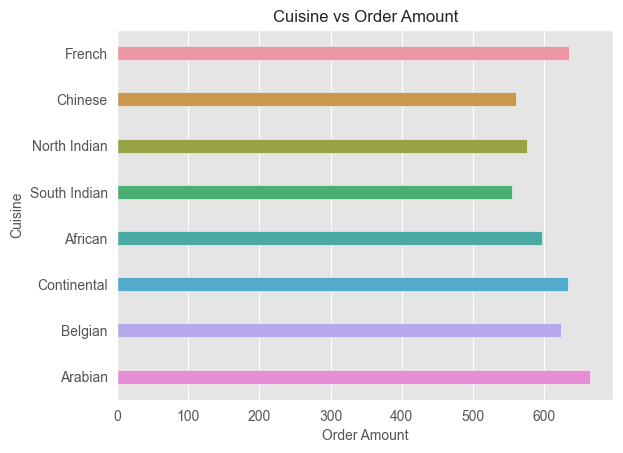

In [54]:
bar_plot('Order Amount', 'Cuisine', OrdersDetails)

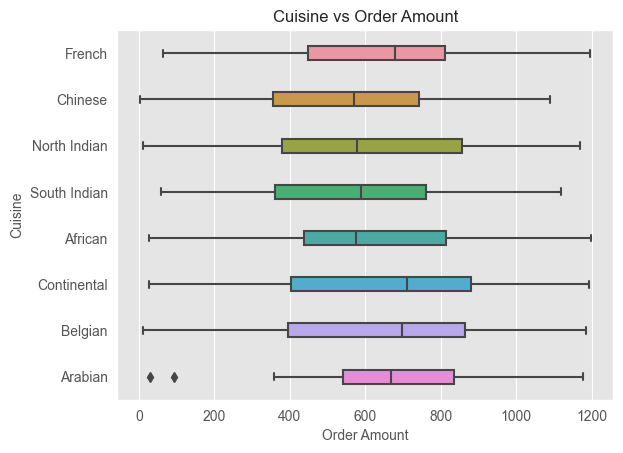

In [55]:
box_plot('Order Amount', 'Cuisine', OrdersDetails)

# Total Amount Of Each Cuisine

In [56]:
CuisineTotalAmount = OrdersDetails.groupby(['Cuisine'], as_index=False, sort=True).agg(TotalAmount = ('Order Amount', sum))

In [57]:
CuisineTotalAmount

,Cuisine,TotalAmount
0,African,36452
1,Arabian,16622
2,Belgian,34996
3,Chinese,45437
4,Continental,34882
5,French,45121
6,North Indian,46706
7,South Indian,38855


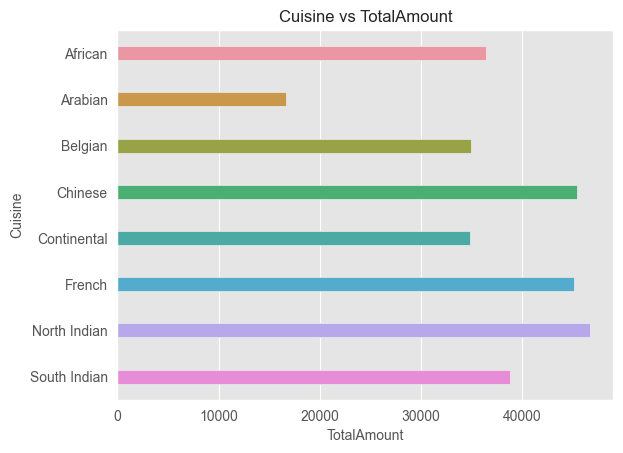

In [58]:
bar_plot('TotalAmount', 'Cuisine', CuisineTotalAmount)

# Sales Quantity Of Each Cuisine

In [59]:
CuisineSalesQuantity = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Quantity of Items': [np.mean, max, min, sum]})
CuisineSalesQuantity

Quantity of Items             
                          mean max min  sum
Cuisine                                    
African                 4.9180   7   1  300
Arabian                 4.6400   7   1  116
Belgian                 4.5179   7   1  253
Chinese                 4.4568   7   1  361
Continental             4.8545   7   1  267
French                  4.8169   7   1  342
North Indian            4.5802   7   1  371
South Indian            4.5143   7   1  316

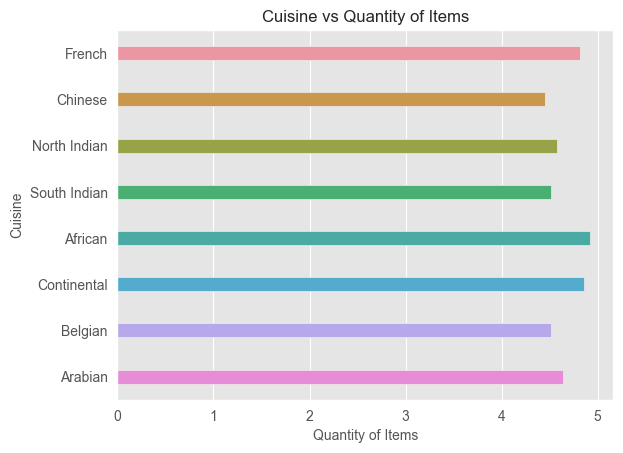

In [60]:
bar_plot('Quantity of Items', 'Cuisine', OrdersDetails)

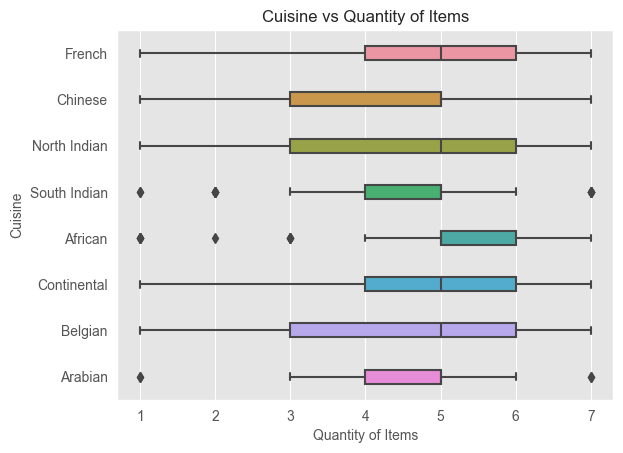

In [61]:
box_plot('Quantity of Items', 'Cuisine', OrdersDetails)

# Order Time Of Each Cuisine

In [62]:
CuisineOrderTime = OrdersDetails.groupby(['Cuisine'], as_index=True, sort=True).agg({'Order Time': np.mean})
CuisineOrderTime

,Order Time
Cuisine,
African,15.8689
Arabian,14.8000
Belgian,16.8929
Chinese,15.9383
Continental,16.1636
French,16.0000
North Indian,16.0864
South Indian,15.6714


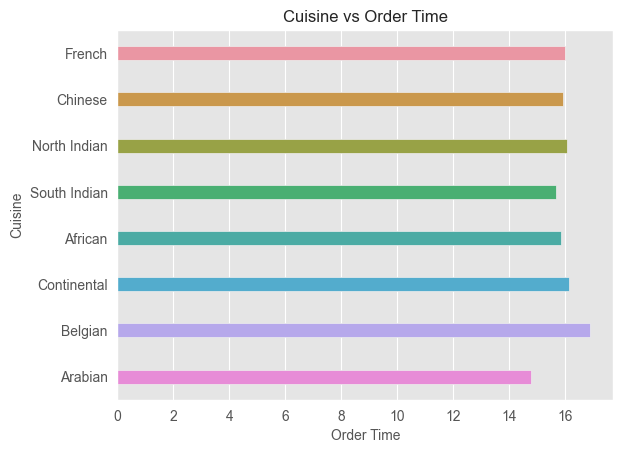

In [63]:
bar_plot('Order Time', 'Cuisine', OrdersDetails)

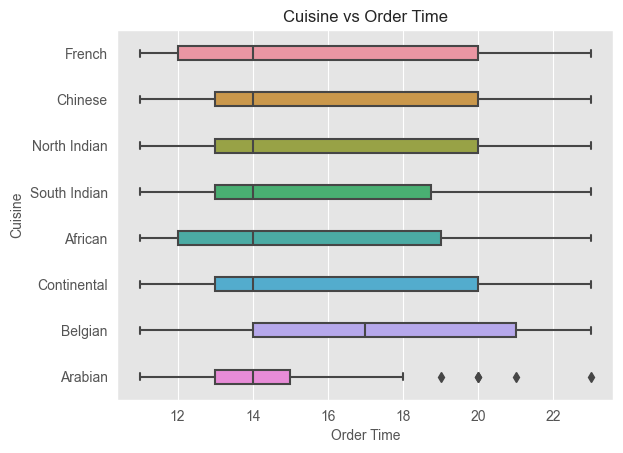

In [64]:
box_plot('Order Time', 'Cuisine', OrdersDetails)

# Count Of Each Types Of Payment Method For Each Cuisine

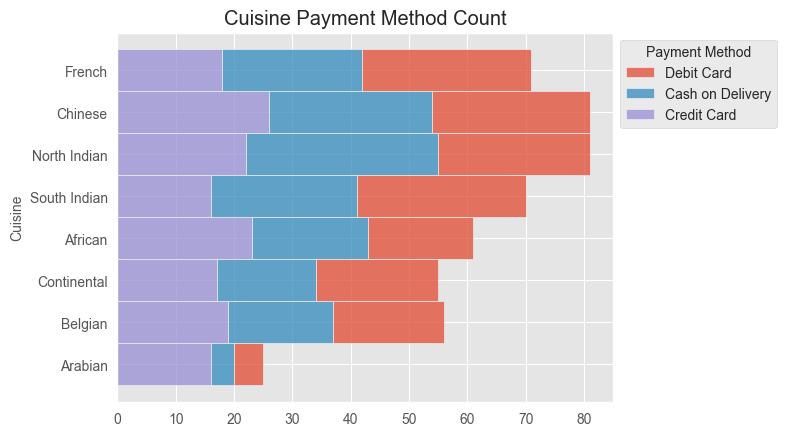

In [65]:
hist_plot('Cuisine', 'Payment Method')

# Pie Chart For Percentage Of Each Paymnet Methods 

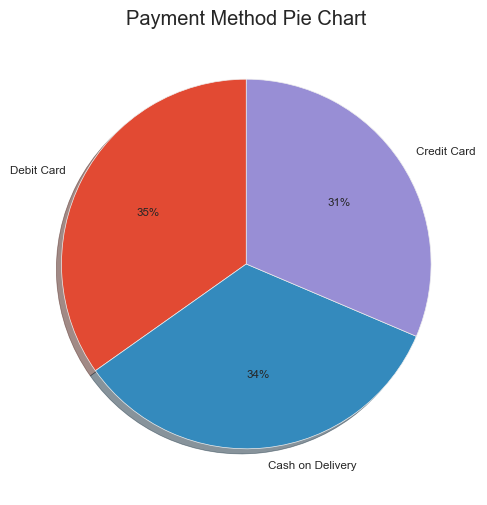

In [66]:
pie_chart('Payment Method')

# Pie Chart For Percentage Of Each Cuisine

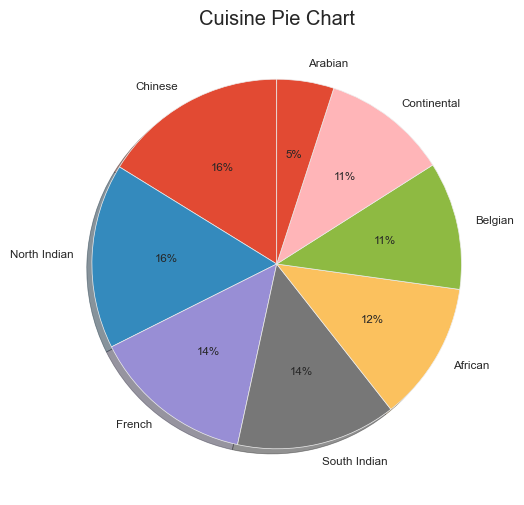

In [67]:
pie_chart('Cuisine')

# Pie Chart For Percentage Of Food Rating

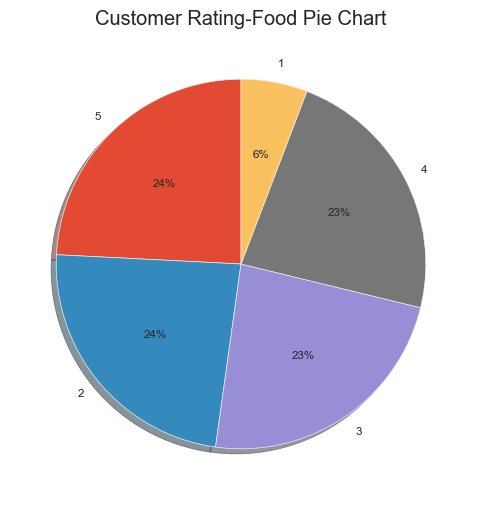

In [68]:
pie_chart('Customer Rating-Food')

# Pie Chart For Percentage Of Each Delivery Rating

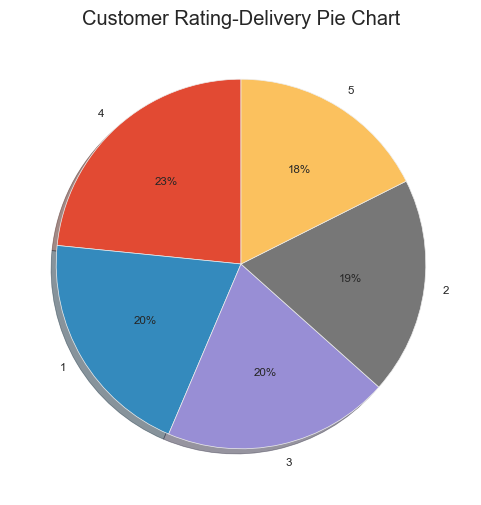

In [69]:
pie_chart('Customer Rating-Delivery')

# Pie Chart For Percentage Of Each Order Time

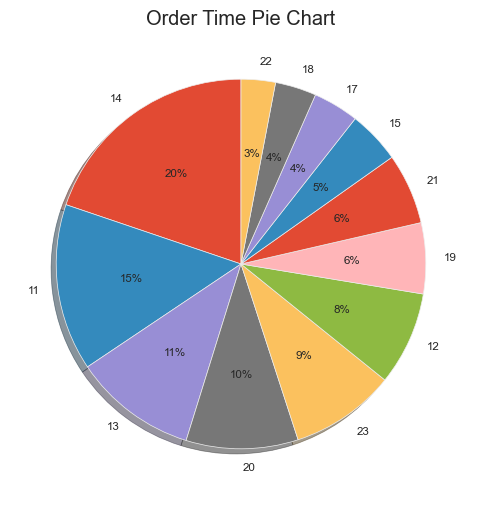

In [70]:
pie_chart('Order Time')

# Count Of Each Paymnet Methods 

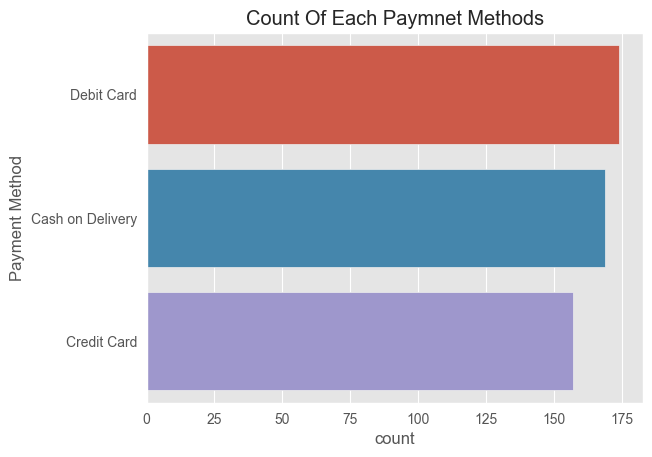

In [71]:
sns.countplot(y=OrdersDetails['Payment Method']).set(title='Count Of Each Paymnet Methods');

# Count Of Each Cuisine 

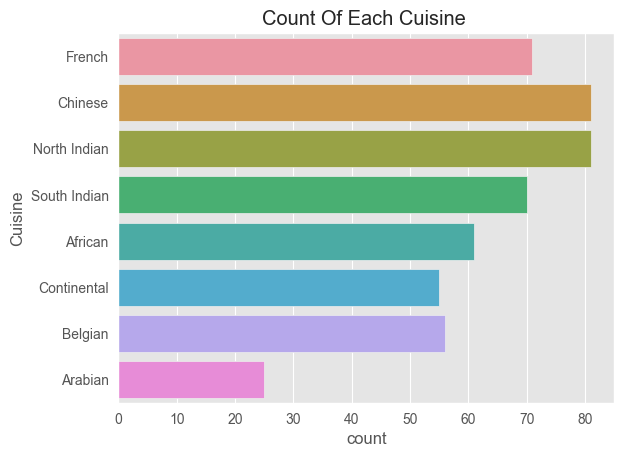

In [72]:
sns.countplot(y=OrdersDetails['Cuisine']).set(title='Count Of Each Cuisine ');

# Count Of Food Rating 

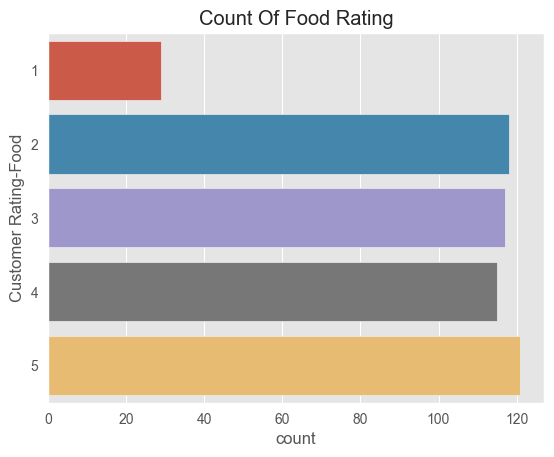

In [73]:
sns.countplot(y=OrdersDetails['Customer Rating-Food']).set(title='Count Of Food Rating');

# Count Of Delivery Rating

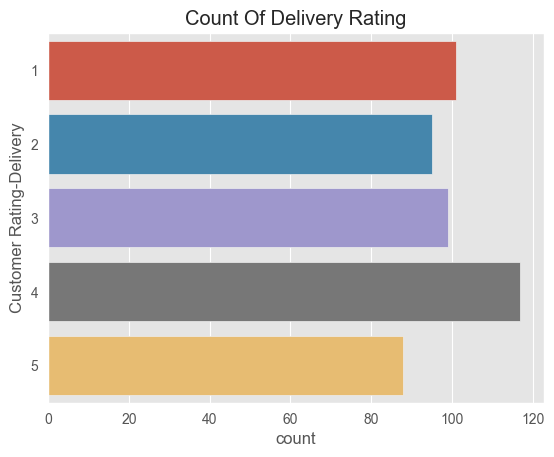

In [74]:
sns.countplot(y=OrdersDetails['Customer Rating-Delivery']).set(title='Count Of Delivery Rating');

# Count Of Order Time

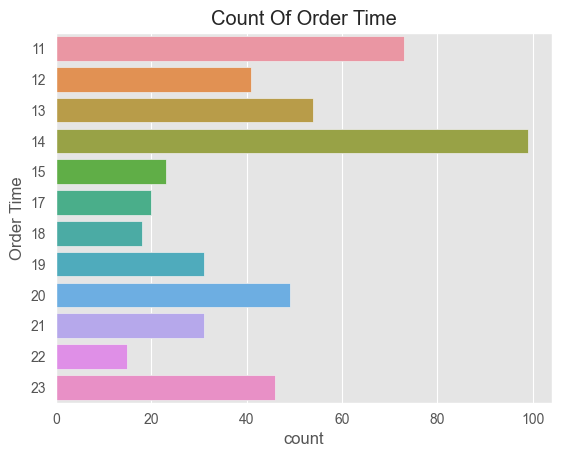

In [75]:
sns.countplot(y=OrdersDetails['Order Time']).set(title='Count Of Order Time');

# Restaurant Pivot Table

**1.Average Of Delivery Rating For Each Quantity Items Of Orders From Each Restaurant**

In [76]:
RestaurantPivotTable1 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Quantity of Items'], values='Customer Rating-Delivery').fillna(0)

In [77]:
RestaurantPivotTable1

Quantity of Items                    1       2       3       4       5  \
Cuisine      RestaurantName                                              
African      Anand Restaurant   3.0000  5.0000  3.0000  3.0000  2.7778   
             Ellora             2.6667  0.0000  3.0000  2.0000  3.3077   
Arabian      Zam Zam            4.5000  0.0000  3.3333  4.0000  2.4615   
Belgian      Chew Restaurant    2.6000  3.5000  3.6667  1.6667  3.0000   
             Sam Hotel          2.0000  4.0000  2.0000  3.5000  2.2500   
Chinese      KSR Hotel          5.0000  2.0000  3.0000  3.0000  2.6667   
             Ruchi              1.0000  3.6667  3.0000  2.0000  3.6667   
             Veer Restaurant    1.0000  4.0000  2.0000  2.5000  2.5714   
Continental  Denver Restaurant  0.0000  0.0000  2.3333  3.4000  1.7778   
             The Cave Hotel     2.0000  5.0000  4.0000  3.8571  3.2500   
French       Oslo               4.0000  0.0000  3.0000  2.2000  3.0000   
             The Taste          0.0000  1.0000  3.5000  3.6667  3.5000   
             Willies            4.0000  0.0000  3.2500  2.2000  2.7000   
North Indian AMN                4.0000  2.6000  4.0000  3.0000  3.2000   
             Excel Restaurant   1.5000  0.0000  3.7500  2.7143  3.2500   
             SSK Hotel          2.0000  2.0000  2.2500  3.3333  3.4000   
             Vrinda Bhavan      3.0000  4.0000  0.0000  4.0000  3.0000   
South Indian ASR Restaurant     0.0000  3.0000  3.3333  2.8000  4.0000   
             Dave Hotel         2.0000  1.0000  2.7500  3.3333  4.4000   
             Win Hotel          1.0000  3.0000  5.0000  3.0000  3.6154   

Quantity of Items                    6       7  
Cuisine      RestaurantName                     
African      Anand Restaurant   3.1818  3.0000  
             Ellora             3.3333  3.5000  
Arabian      Zam Zam            2.6667  5.0000  
Belgian      Chew Restaurant    1.7500  1.5000  
             Sam Hotel          4.0000  3.1111  
Chinese      KSR Hotel          2.5000  3.3333  
             Ruchi              2.6667  3.5000  
             Veer Restaurant    2.0000  3.5000  
Continental  Denver Restaurant  2.8333  0.0000  
             The Cave Hotel     4.0000  3.1667  
French       Oslo               2.2500  3.0000  
             The Taste          1.5000  3.2500  
             Willies            4.6667  3.0000  
North Indian AMN                2.2500  4.0000  
             Excel Restaurant   3.0000  3.2500  
             SSK Hotel          2.0000  3.2500  
             Vrinda Bhavan      3.0000  2.4000  
South Indian ASR Restaurant     3.3333  2.3333  
             Dave Hotel         4.7500  1.0000  
             Win Hotel          4.0000  1.5000

**2.Average Of Food Rating For Each Quantity Items Of Orders From Each Restaurant**

In [78]:
RestaurantPivotTable2 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Quantity of Items'], values='Customer Rating-Food').fillna(0)

In [79]:
RestaurantPivotTable2

Quantity of Items                 1       2       3       4       5       6  \
Cuisine      RestaurantName                                                   
African      Anand Restaurant   4.0  5.0000  2.5000  1.0000  3.7778  3.3636   
             Ellora             3.0  0.0000  2.5000  3.7500  3.6923  3.6667   
Arabian      Zam Zam            4.0  0.0000  1.6667  4.0000  3.5385  4.0000   
Belgian      Chew Restaurant    3.6  3.5000  2.8333  3.3333  2.8000  2.8750   
             Sam Hotel          4.5  4.0000  4.0000  3.5000  2.8750  3.0000   
Chinese      KSR Hotel          2.0  3.6667  3.0000  3.0000  3.6667  2.5000   
             Ruchi              5.0  3.3333  3.6667  3.2500  3.3333  3.0000   
             Veer Restaurant    3.0  3.0000  5.0000  2.7500  3.5000  2.0000   
Continental  Denver Restaurant  0.0  0.0000  3.3333  3.2000  2.7778  3.3333   
             The Cave Hotel     3.0  5.0000  3.0000  3.7143  3.8333  3.3333   
French       Oslo               2.0  0.0000  3.8000  3.8000  3.2500  3.0000   
             The Taste          0.0  2.0000  3.5000  2.6667  3.0000  3.5000   
             Willies            5.0  0.0000  3.7500  2.4000  3.0000  3.3333   
North Indian AMN                3.0  4.0000  3.0000  4.0000  3.8000  4.0000   
             Excel Restaurant   3.0  0.0000  3.2500  3.2857  3.5000  4.5000   
             SSK Hotel          2.0  2.0000  3.7500  3.3333  3.4000  4.5000   
             Vrinda Bhavan      5.0  4.0000  0.0000  3.3333  3.7500  4.5000   
South Indian ASR Restaurant     0.0  3.0000  3.3333  3.2000  4.0000  4.0000   
             Dave Hotel         4.0  3.5000  3.0000  3.3333  3.4000  3.5000   
             Win Hotel          5.0  3.0000  1.0000  3.5000  2.7692  2.6667   

Quantity of Items                    7  
Cuisine      RestaurantName             
African      Anand Restaurant   2.6667  
             Ellora             3.5000  
Arabian      Zam Zam            3.5000  
Belgian      Chew Restaurant    5.0000  
             Sam Hotel          3.2222  
Chinese      KSR Hotel          3.6667  
             Ruchi              5.0000  
             Veer Restaurant    2.5000  
Continental  Denver Restaurant  0.0000  
             The Cave Hotel     3.1667  
French       Oslo               3.2500  
             The Taste          3.5000  
             Willies            3.5000  
North Indian AMN                3.0000  
             Excel Restaurant   3.7500  
             SSK Hotel          3.0000  
             Vrinda Bhavan      4.0000  
South Indian ASR Restaurant     3.0000  
             Dave Hotel         2.0000  
             Win Hotel          2.5000

**3.Average Of Delivery Taken Time For Each Quantity Items Of Orders From Each Restaurant**

In [80]:
RestaurantPivotTable3 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Quantity of Items'], values='Delivery Time Taken (mins)').fillna(0).astype(int)

In [81]:
RestaurantPivotTable3

Quantity of Items                1   2   3   4   5   6   7
Cuisine      RestaurantName                               
African      Anand Restaurant   33  31  34  48  30  32  28
             Ellora             32   0  48  25  31  35  27
Arabian      Zam Zam            26   0  29  14  32  29  14
Belgian      Chew Restaurant    25  34  25  41  36  29  49
             Sam Hotel          45  23  38  35  28  30  29
Chinese      KSR Hotel          10  39  21  39  23  23  41
             Ruchi              28  29  36  43  28  22  45
             Veer Restaurant    48  46  36  35  29  28  28
Continental  Denver Restaurant   0   0  21  28  30  31   0
             The Cave Hotel     29  10  22  30  22  21  33
French       Oslo               23   0  37  33  29  29  23
             The Taste           0  30  37  30  28  32  25
             Willies            32   0  26  28  35  28  32
North Indian AMN                50  25  30  16  37  29  30
             Excel Restaurant   20   0  28  24  26  30  40
             SSK Hotel          28  33  24  16  40  38  32
             Vrinda Bhavan      27  33   0  31  36  22  33
South Indian ASR Restaurant      0  22  39  23  39  24  38
             Dave Hotel         45  28  27  14  28  30  31
             Win Hotel          47  21  46  30  31  35  15

**4.Sum Of Order Amount For Each Quantity Items Of Orders From Each Restaurant**

In [82]:
RestaurantPivotTable4 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Quantity of Items'], values='Order Amount', aggfunc=sum).fillna(0)

In [83]:
RestaurantPivotTable4

Quantity of Items                   1      2       3       4       5       6  \
Cuisine      RestaurantName                                                    
African      Anand Restaurant   130.0   76.0   958.0   782.0  6556.0  8260.0   
             Ellora             254.0    0.0   966.0  1441.0  7123.0  4305.0   
Arabian      Zam Zam            122.0    0.0  1999.0  1300.0  9199.0  2532.0   
Belgian      Chew Restaurant    406.0  186.0  3637.0  1532.0  3399.0  6961.0   
             Sam Hotel          229.0  133.0   986.0  1142.0  6283.0   964.0   
Chinese      KSR Hotel           36.0  102.0  2109.0  2775.0  3436.0  1733.0   
             Ruchi              125.0  140.0  4241.0  1084.0  4190.0  2331.0   
             Veer Restaurant     19.0  100.0   471.0  2102.0  9348.0  2017.0   
Continental  Denver Restaurant    0.0    0.0  1214.0  2120.0  7741.0  4873.0   
             The Cave Hotel      28.0  125.0  1307.0  2551.0  7326.0  2728.0   
French       Oslo                65.0    0.0  2130.0  2571.0  2421.0  3622.0   
             The Taste            0.0  124.0  1495.0  1945.0  4211.0  1889.0   
             Willies            267.0    0.0  2327.0  1831.0  6314.0  3013.0   
North Indian AMN                 37.0  393.0  1298.0   610.0  4643.0  3383.0   
             Excel Restaurant   179.0    0.0  2015.0  2652.0  2407.0  1917.0   
             SSK Hotel           40.0   50.0  1942.0  1346.0  3049.0  1829.0   
             Vrinda Bhavan       41.0   20.0     0.0  1089.0  3046.0  2008.0   
South Indian ASR Restaurant       0.0  305.0  1233.0  2610.0  3686.0  2340.0   
             Dave Hotel         116.0  152.0  2092.0  1685.0  2376.0  3477.0   
             Win Hotel          140.0  114.0   418.0  2247.0  8368.0  2358.0   

Quantity of Items                    7  
Cuisine      RestaurantName             
African      Anand Restaurant   1827.0  
             Ellora             3774.0  
Arabian      Zam Zam            1470.0  
Belgian      Chew Restaurant    1475.0  
             Sam Hotel          7663.0  
Chinese      KSR Hotel          2404.0  
             Ruchi              1563.0  
             Veer Restaurant    5111.0  
Continental  Denver Restaurant     0.0  
             The Cave Hotel     4869.0  
French       Oslo               3006.0  
             The Taste          3318.0  
             Willies            4572.0  
North Indian AMN                2562.0  
             Excel Restaurant   2731.0  
             SSK Hotel          3851.0  
             Vrinda Bhavan      3568.0  
South Indian ASR Restaurant     2405.0  
             Dave Hotel          940.0  
             Win Hotel          1793.0

**5.Average Of Order Time For Each Quantity Items Of Orders From Each Restaurant**

In [84]:
RestaurantPivotTable5 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Quantity of Items'], values='Order Time', aggfunc=np.mean).fillna(0).astype(int)

In [85]:
RestaurantPivotTable5

Quantity of Items                1   2   3   4   5   6   7
Cuisine      RestaurantName                               
African      Anand Restaurant   15  12  19  23  15  15  17
             Ellora             16   0  14  17  16  13  16
Arabian      Zam Zam            15   0  15  13  15  15  12
Belgian      Chew Restaurant    17  16  13  17  18  16  17
             Sam Hotel          19  22  11  17  17  11  18
Chinese      KSR Hotel          13  16  15  17  12  19  15
             Ruchi              13  18  16  18  13  14  17
             Veer Restaurant    11  19  14  17  15  20  17
Continental  Denver Restaurant   0   0  13  14  17  18   0
             The Cave Hotel     14  14  17  16  15  15  17
French       Oslo               13   0  16  16  17  17  16
             The Taste           0  22  18  20  15  17  15
             Willies            12   0  18  12  15  12  16
North Indian AMN                23  17  20  13  15  14  13
             Excel Restaurant   18   0  17  14  16  14  18
             SSK Hotel          22  23  14  19  15  21  13
             Vrinda Bhavan      15  14   0  19  13  17  14
South Indian ASR Restaurant      0  15  12  14  16  16  20
             Dave Hotel         15  13  16  20  18  20  11
             Win Hotel          14  14  17  13  14  13  13

**6.Average Of Delivery Rating For Each Payment Method Of Orders From Each Restauran**

In [86]:
RestaurantPivotTable6 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Payment Method'], values='Customer Rating-Delivery').fillna(0)

In [87]:
RestaurantPivotTable6

Payment Method                  Cash on Delivery  Credit Card  Debit Card
Cuisine      RestaurantName                                              
African      Anand Restaurant             3.3636       2.9333      2.6667
             Ellora                       2.7778       3.5000      3.0667
Arabian      Zam Zam                      3.0000       2.8750      3.8000
Belgian      Chew Restaurant              2.0000       1.8889      3.6364
             Sam Hotel                    3.2857       3.0000      2.0000
Chinese      KSR Hotel                    3.4444       2.8333      2.3333
             Ruchi                        2.2000       3.3333      3.5556
             Veer Restaurant              2.2222       3.2727      2.4444
Continental  Denver Restaurant            2.2000       2.0000      2.9091
             The Cave Hotel               3.0833       3.5000      4.0000
French       Oslo                         2.8889       2.6000      2.6667
             The Taste                    3.1667       3.2500      3.0000
             Willies                      3.1111       3.1111      2.9167
North Indian AMN                          3.3333       2.6250      3.3750
             Excel Restaurant             3.2000       3.4000      2.5000
             SSK Hotel                    3.2222       2.6667      2.4000
             Vrinda Bhavan                2.6250       4.0000      3.2000
South Indian ASR Restaurant               3.7778       2.5000      3.0000
             Dave Hotel                   4.2500       2.3333      2.8889
             Win Hotel                    3.7500       3.4444      2.8000

**7.Average Of Food Rating For Each Payment Method Of Orders From Each Restaurant**

In [88]:
RestaurantPivotTable7 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Payment Method'], values='Customer Rating-Food').fillna(0)


In [89]:
RestaurantPivotTable7

Payment Method                  Cash on Delivery  Credit Card  Debit Card
Cuisine      RestaurantName                                              
African      Anand Restaurant             3.2727       3.4667      3.3333
             Ellora                       3.4444       4.3750      3.1333
Arabian      Zam Zam                      2.0000       3.8750      3.2000
Belgian      Chew Restaurant              2.9091       3.1111      3.5455
             Sam Hotel                    3.2857       3.7000      2.8750
Chinese      KSR Hotel                    3.1111       3.3333      3.3333
             Ruchi                        3.0000       4.1111      3.6667
             Veer Restaurant              3.3333       2.8182      3.2222
Continental  Denver Restaurant            3.0000       3.2857      3.0000
             The Cave Hotel               3.4167       3.8000      3.6000
French       Oslo                         3.3333       3.6000      3.3333
             The Taste                    3.8333       3.0000      2.6250
             Willies                      3.5556       3.3333      3.0000
North Indian AMN                          4.0000       3.6250      3.5000
             Excel Restaurant             3.9000       3.2000      3.1250
             SSK Hotel                    3.4444       3.1667      3.4000
             Vrinda Bhavan                4.3750       4.0000      3.2000
South Indian ASR Restaurant               3.5556       3.5000      3.4000
             Dave Hotel                   3.5000       4.0000      2.8889
             Win Hotel                    2.8750       2.8889      3.0000

**8.Average Of Delivery Taken Time For Each Payment Method Of Orders From Each Restaurant**

In [90]:
RestaurantPivotTable8 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Payment Method'], values='Delivery Time Taken (mins)').fillna(0).astype(int)


In [91]:
RestaurantPivotTable8

Payment Method                  Cash on Delivery  Credit Card  Debit Card
Cuisine      RestaurantName                                              
African      Anand Restaurant                 31           30          43
             Ellora                           31           36          30
Arabian      Zam Zam                          25           29          25
Belgian      Chew Restaurant                  32           33          30
             Sam Hotel                        31           29          32
Chinese      KSR Hotel                        30           34          29
             Ruchi                            29           30          42
             Veer Restaurant                  30           35          27
Continental  Denver Restaurant                27           28          30
             The Cave Hotel                   31           22          23
French       Oslo                             23           29          38
             The Taste                        26           39          27
             Willies                          29           34          31
North Indian AMN                              25           39          25
             Excel Restaurant                 26           34          26
             SSK Hotel                        29           31          31
             Vrinda Bhavan                    29           39          32
South Indian ASR Restaurant                   26           33          35
             Dave Hotel                       31           12          29
             Win Hotel                        29           30          32

**9.Sum Of Order Amount For Each Payment Method Of Orders From Each Restaurant**

In [92]:
RestaurantPivotTable9 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Payment Method'], values='Order Amount', aggfunc=sum).fillna(0)


In [93]:
RestaurantPivotTable9

Payment Method                  Cash on Delivery  Credit Card  Debit Card
Cuisine      RestaurantName                                              
African      Anand Restaurant               6713         8983        2893
             Ellora                         4572         4182        9109
Arabian      Zam Zam                        2497        10205        3920
Belgian      Chew Restaurant                5829         6018        5749
             Sam Hotel                      4700         7100        5600
Chinese      KSR Hotel                      5010         3712        3873
             Ruchi                          3756         5428        4490
             Veer Restaurant                5941         6962        6265
Continental  Denver Restaurant              2786         5442        7720
             The Cave Hotel                 7107         6200        5627
French       Oslo                           5765         1855        6195
             The Taste                      4691         2885        5406
             Willies                        4231         5501        8592
North Indian AMN                            4081         4003        4842
             Excel Restaurant               5569         3202        3130
             SSK Hotel                      6055         3229        2823
             Vrinda Bhavan                  4502         1174        4096
South Indian ASR Restaurant                 4505         1781        6293
             Dave Hotel                     4354         1013        5471
             Win Hotel                      5490         4569        5379

**10.Average Of Order Time For Each Payment Method Of Orders From Each Restaurant**

In [94]:
RestaurantPivotTable10 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Payment Method'], values='Order Time', aggfunc=sum).fillna(0)

In [95]:
RestaurantPivotTable10

Payment Method                  Cash on Delivery  Credit Card  Debit Card
Cuisine      RestaurantName                                              
African      Anand Restaurant                180          251          36
             Ellora                          139          125         237
Arabian      Zam Zam                          65          233          72
Belgian      Chew Restaurant                 190          149         173
             Sam Hotel                       119          168         147
Chinese      KSR Hotel                       127           98         150
             Ruchi                           158          139         149
             Veer Restaurant                 137          182         151
Continental  Denver Restaurant                84          114         182
             The Cave Hotel                  205          157         147
French       Oslo                            143           82         152
             The Taste                       102           62         143
             Willies                         121          156         175
North Indian AMN                              95          139         115
             Excel Restaurant                153           96         125
             SSK Hotel                       146          103          86
             Vrinda Bhavan                   124           44          77
South Indian ASR Restaurant                  143           57         164
             Dave Hotel                      145           51         158
             Win Hotel                       123          122         134

**11.Average Of Delivery Taken Time For Each Delivery Rating**

In [96]:
RestaurantPivotTable11 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Customer Rating-Delivery'], values='Delivery Time Taken (mins)').fillna(0).astype(int)

In [97]:
RestaurantPivotTable11

Customer Rating-Delivery         1   2   3   4   5
Cuisine      RestaurantName                       
African      Anand Restaurant   44  29  33  37  28
             Ellora             35  27  35  32  26
Arabian      Zam Zam            35  37  26  31  18
Belgian      Chew Restaurant    35  32  32  26  27
             Sam Hotel          30  35  31  21  34
Chinese      KSR Hotel          30  28   0  31  34
             Ruchi              35  37  31  30  37
             Veer Restaurant    30  31  33  28  35
Continental  Denver Restaurant  32  31  21  24  37
             The Cave Hotel     25  23  25  28  24
French       Oslo               30  33  29  32  27
             The Taste          25  25  37  31  29
             Willies            31  30  34  32  26
North Indian AMN                32  22  37  31  25
             Excel Restaurant   16  26  30  31  39
             SSK Hotel          14  33  20  37  19
             Vrinda Bhavan      35  15  32  28  37
South Indian ASR Restaurant     38  21  27  33  35
             Dave Hotel         23  45  12  28  29
             Win Hotel          32  31  26  27  40

**12.Average Of Delivery Taken Time For Each Order Time**

In [98]:
RestaurantPivotTable12 = pd.pivot_table(OrdersDetails, index=['Cuisine', 'RestaurantName'], columns=['Order Time'], values='Delivery Time Taken (mins)').fillna(0).astype(int)

In [99]:
RestaurantPivotTable12

Order Time                      11  12  13  14  15  17  18  19  20  21  22  23
Cuisine      RestaurantName                                                   
African      Anand Restaurant   22  40  45  36  49  44   0  26  32  29   0  22
             Ellora             36  22  46  37  21  27  46  31  26  18  27  42
Arabian      Zam Zam            24  28  30  25  34   0  30  45  26  31   0  25
Belgian      Chew Restaurant    24   0  34  33  13  27  41  28  41  37  29   0
             Sam Hotel          31  33  34  22  24   0  43  44  17  23  32  37
Chinese      KSR Hotel          18  27  33  32  27   0   0  30  33  39   0  33
             Ruchi              39  20  32  36  26  20  43  37  37  46   0  22
             Veer Restaurant    35  24  23  34   0   0   0  43  40  10  12  23
Continental  Denver Restaurant  40  32  26  28   0  20  29  37  30  24  25  27
             The Cave Hotel     25  37  28  21  14  30   0  43  28  22   0  23
French       Oslo               19  27  26  44   0  48   0  44  22  38   0  37
             The Taste          16  36  36  23   0  33   0  23   0  40  30  22
             Willies            30  24   0  26  27   0   0  44  30  35   0  44
North Indian AMN                44  28  23  25   0   0  22  28  33   0   0  49
             Excel Restaurant   29  20  31  29   0  26  45  33  29  21  28  21
             SSK Hotel          16  31  21  40   0  43  48  47   0  33  28  24
             Vrinda Bhavan      33   0   0  32  27   0  15  48  25   0   0   0
South Indian ASR Restaurant     29   0  38  24  31  19  22  50  35   0  40  50
             Dave Hotel         31   0  43  13  41   0  30   0  12  25  28  29
             Win Hotel          24  36  37  27  44  38   0   0  30   0   0  11

# Restaurant Melt

In [100]:
RestaurantMelt1 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Quantity of Items'], ignore_index=True)

In [101]:
RestaurantMelt1

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Quantity of Items,5
1,OD68,French,Willies,Quantity of Items,5
2,OD76,French,Willies,Quantity of Items,7
3,OD78,French,Willies,Quantity of Items,5
4,OD96,French,Willies,Quantity of Items,4
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Quantity of Items,4
496,OD393,North Indian,Vrinda Bhavan,Quantity of Items,4
497,OD434,North Indian,Vrinda Bhavan,Quantity of Items,7
498,OD437,North Indian,Vrinda Bhavan,Quantity of Items,5


In [102]:
RestaurantMelt2 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Order Amount'], ignore_index=True)

In [103]:
RestaurantMelt2

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Order Amount,633
1,OD68,French,Willies,Order Amount,345
2,OD76,French,Willies,Order Amount,934
3,OD78,French,Willies,Order Amount,908
4,OD96,French,Willies,Order Amount,300
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Order Amount,460
496,OD393,North Indian,Vrinda Bhavan,Order Amount,450
497,OD434,North Indian,Vrinda Bhavan,Order Amount,837
498,OD437,North Indian,Vrinda Bhavan,Order Amount,1169


In [104]:
RestaurantMelt3 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Payment Method'], ignore_index=True)

In [105]:
RestaurantMelt3

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Payment Method,Debit Card
1,OD68,French,Willies,Payment Method,Cash on Delivery
2,OD76,French,Willies,Payment Method,Debit Card
3,OD78,French,Willies,Payment Method,Debit Card
4,OD96,French,Willies,Payment Method,Cash on Delivery
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Payment Method,Cash on Delivery
496,OD393,North Indian,Vrinda Bhavan,Payment Method,Debit Card
497,OD434,North Indian,Vrinda Bhavan,Payment Method,Debit Card
498,OD437,North Indian,Vrinda Bhavan,Payment Method,Debit Card


In [106]:
RestaurantMelt4 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Delivery Time Taken (mins)'], ignore_index=True)

In [107]:
RestaurantMelt4

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Delivery Time Taken (mins),47
1,OD68,French,Willies,Delivery Time Taken (mins),22
2,OD76,French,Willies,Delivery Time Taken (mins),30
3,OD78,French,Willies,Delivery Time Taken (mins),15
4,OD96,French,Willies,Delivery Time Taken (mins),27
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Delivery Time Taken (mins),31
496,OD393,North Indian,Vrinda Bhavan,Delivery Time Taken (mins),15
497,OD434,North Indian,Vrinda Bhavan,Delivery Time Taken (mins),50
498,OD437,North Indian,Vrinda Bhavan,Delivery Time Taken (mins),43


In [108]:
RestaurantMelt5 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Customer Rating-Food'], ignore_index=True)

In [109]:
RestaurantMelt5

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Customer Rating-Food,5
1,OD68,French,Willies,Customer Rating-Food,4
2,OD76,French,Willies,Customer Rating-Food,2
3,OD78,French,Willies,Customer Rating-Food,3
4,OD96,French,Willies,Customer Rating-Food,2
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Customer Rating-Food,4
496,OD393,North Indian,Vrinda Bhavan,Customer Rating-Food,2
497,OD434,North Indian,Vrinda Bhavan,Customer Rating-Food,1
498,OD437,North Indian,Vrinda Bhavan,Customer Rating-Food,3


In [110]:
RestaurantMelt6 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Customer Rating-Delivery'], ignore_index=True)

In [111]:
RestaurantMelt6

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Customer Rating-Delivery,3
1,OD68,French,Willies,Customer Rating-Delivery,5
2,OD76,French,Willies,Customer Rating-Delivery,4
3,OD78,French,Willies,Customer Rating-Delivery,2
4,OD96,French,Willies,Customer Rating-Delivery,2
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Customer Rating-Delivery,5
496,OD393,North Indian,Vrinda Bhavan,Customer Rating-Delivery,4
497,OD434,North Indian,Vrinda Bhavan,Customer Rating-Delivery,1
498,OD437,North Indian,Vrinda Bhavan,Customer Rating-Delivery,5


In [112]:
RestaurantMelt7 = pd.melt(OrdersDetails, id_vars=['Order ID','Cuisine', 'RestaurantName'], value_vars=['Order Time'], ignore_index=True)

In [113]:
RestaurantMelt7

,Order ID,Cuisine,RestaurantName,variable,value
0,OD1,French,Willies,Order Time,23
1,OD68,French,Willies,Order Time,11
2,OD76,French,Willies,Order Time,12
3,OD78,French,Willies,Order Time,11
4,OD96,French,Willies,Order Time,15
...,...,...,...,...,...
495,OD389,North Indian,Vrinda Bhavan,Order Time,20
496,OD393,North Indian,Vrinda Bhavan,Order Time,18
497,OD434,North Indian,Vrinda Bhavan,Order Time,14
498,OD437,North Indian,Vrinda Bhavan,Order Time,11


# Restaurant Crosstab

In [114]:
RestaurantCrosstab1 = pd.crosstab(index=OrdersDetails['RestaurantName'], columns=OrdersDetails['Cuisine'])

In [115]:
RestaurantCrosstab1

Cuisine,African,Arabian,Belgian,Chinese,Continental,French,North Indian,South Indian
RestaurantName,,,,,,,,
AMN,0,0,0,0,0,0,22,0
ASR Restaurant,0,0,0,0,0,0,0,23
Anand Restaurant,29,0,0,0,0,0,0,0
Chew Restaurant,0,0,31,0,0,0,0,0
Dave Hotel,0,0,0,0,0,0,0,20
Denver Restaurant,0,0,0,0,23,0,0,0
Ellora,32,0,0,0,0,0,0,0
Excel Restaurant,0,0,0,0,0,0,23,0
KSR Hotel,0,0,0,24,0,0,0,0


In [116]:
RestaurantCrosstab2 = pd.crosstab(index=OrdersDetails['RestaurantName'], columns=OrdersDetails['Payment Method'])

In [117]:
RestaurantCrosstab2

Payment Method,Cash on Delivery,Credit Card,Debit Card
RestaurantName,,,
AMN,6,8,8
ASR Restaurant,9,4,10
Anand Restaurant,11,15,3
Chew Restaurant,11,9,11
Dave Hotel,8,3,9
Denver Restaurant,5,7,11
Ellora,9,8,15
Excel Restaurant,10,5,8
KSR Hotel,9,6,9


In [118]:
RestaurantCrosstab3 = pd.crosstab(index=OrdersDetails['Cuisine'], columns=OrdersDetails['Payment Method'])

In [119]:
RestaurantCrosstab3

Payment Method,Cash on Delivery,Credit Card,Debit Card
Cuisine,,,
African,20,23,18
Arabian,4,16,5
Belgian,18,19,19
Chinese,28,26,27
Continental,17,17,21
French,24,18,29
North Indian,33,22,26
South Indian,25,16,29


In [120]:
RestaurantCrosstab4 = pd.crosstab(index=OrdersDetails['RestaurantName'], columns=OrdersDetails['Order Time'])

In [121]:
RestaurantCrosstab4

Order Time,11,12,13,14,15,17,18,19,20,21,22,23
RestaurantName,,,,,,,,,,,,
AMN,2,2,3,6,0,0,2,2,3,0,0,2
ASR Restaurant,5,0,2,4,2,1,2,1,4,0,1,1
Anand Restaurant,5,4,2,4,1,2,0,3,2,1,0,5
Chew Restaurant,5,0,2,6,1,3,2,3,3,4,2,0
Dave Hotel,2,0,1,3,3,0,2,0,2,2,1,4
Denver Restaurant,2,2,3,5,0,1,1,1,2,3,1,2
Ellora,6,4,2,4,2,2,2,3,3,1,2,1
Excel Restaurant,3,2,3,4,0,2,1,1,2,1,2,2
KSR Hotel,2,2,5,6,1,0,0,2,3,1,0,2
